In [0]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from statistics import mean
import random
from pandas import DataFrame
import matplotlib
import numpy as np
# be able to save images on server
matplotlib.use('Agg')
from matplotlib import pyplot
%matplotlib inline

top_words = 5000
(x_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
embedding_dimension = 50
top_words = 5000

def get_data(maxlen):
    x = sequence.pad_sequences(x_train, maxlen=maxlen,padding='post',truncating='post')
    return x,y_train

In [0]:
!nvidia-smi

Sun May 10 20:48:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:

def get_hyper_param(n_iteration):
  hyper_param = []  # learning_rate, n_hidden, timestep, epochs
  for i in range(n_iteration):
    current_params = []
    current_params.append(np.random.uniform(0,0.5))
    current_params.append(np.random.randint(1,511))
    current_params.append(np.random.randint(1,511))
    current_params.append(np.random.randint(1,15))
    hyper_param.append(current_params)
  return hyper_param
  
hyper_parameter = get_hyper_param(70)


In [0]:
#hyper_para = [[0.01,128,500,1],[0.01,100,500,1],[0.01,110,400,1],[0.001,256,400,1]]

In [0]:
# for learning_rate, n_neurons, n_timesteps, n_epochs in hyper_para:
#   print('lr',learning_rate, 'n_neurons', n_neurons, 'n_timesteps', n_timesteps,'n_epochs', n_epochs)

In [0]:
train_loss, val_loss = list(), list()
best_params = []
def fit_lstm_random(batch_size):
  min_val_loss = 999
  for learning_rate, n_neurons, n_timesteps, n_epochs in hyper_parameter:
    print('lr',learning_rate, 'n_neurons', n_neurons, 'n_timesteps', n_timesteps,'n_epochs', n_epochs)
    model = Sequential()
    model.add(Embedding(top_words, embedding_dimension,input_length=n_timesteps,mask_zero=True))
    model.add(LSTM(n_neurons,return_sequences=False))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=Adam(lr=learning_rate),metrics=['accuracy'])
    # fit model
    get_train_x,label_array = get_data(n_timesteps)
    lstm_model = model.fit(get_train_x,label_array,epochs=n_epochs,batch_size=batch_size,validation_split=0.2,verbose = 2)
    current_val_loss = lstm_model.history['val_loss'][-1]
    if current_val_loss < min_val_loss:
      min_val_loss = current_val_loss
      best_params = [learning_rate,n_neurons,n_timesteps,n_epochs]
      print('best_params',best_params)
    
  print('final best params',best_params)
  return best_params


In [0]:
train_loss, val_loss = list(), list()
repeats = 1
def run_lstm_random():
  n_batch = 100
  history = fit_lstm_random(n_batch)
  #train_loss.append(history.history['loss'])
  #val_loss.append(history.history['val_loss'])
    
    #pyplot.plot([i+1 for i in range(repeats)], train_loss,'-o',color='blue')
    #pyplot.plot([i+1 for i in range(repeats)], val_loss,'-o',color='orange')
 

In [0]:
run_lstm_random()

lr 0.1379619270138665 n_neurons 342 n_timesteps 101 n_epochs 10
Epoch 1/10
625/625 - 13s - loss: 1.2921 - accuracy: 0.5031 - val_loss: 1.1310 - val_accuracy: 0.4920
Epoch 2/10
625/625 - 12s - loss: 1.2815 - accuracy: 0.5013 - val_loss: 1.4641 - val_accuracy: 0.4906
Epoch 3/10
625/625 - 12s - loss: 1.2668 - accuracy: 0.5034 - val_loss: 1.5688 - val_accuracy: 0.4926
Epoch 4/10
625/625 - 12s - loss: 1.3405 - accuracy: 0.5023 - val_loss: 1.4605 - val_accuracy: 0.5046
Epoch 5/10
625/625 - 12s - loss: 1.3861 - accuracy: 0.5060 - val_loss: 1.5690 - val_accuracy: 0.5080
Epoch 6/10
625/625 - 12s - loss: 1.3459 - accuracy: 0.5033 - val_loss: 1.3735 - val_accuracy: 0.5110
Epoch 7/10
625/625 - 12s - loss: 1.3485 - accuracy: 0.5013 - val_loss: 1.2229 - val_accuracy: 0.4798
Epoch 8/10
625/625 - 12s - loss: 1.3456 - accuracy: 0.4994 - val_loss: 1.4975 - val_accuracy: 0.4930
Epoch 9/10
625/625 - 12s - loss: 1.2935 - accuracy: 0.5031 - val_loss: 1.3450 - val_accuracy: 0.5100
Epoch 10/10
625/625 - 12s -

In [0]:
def fit_lstm(batch_size, n_epochs, neurons, learning_rate, input_length):
    # prepare model
    model = Sequential()
    model.add(Embedding(top_words, embedding_dimension,input_length=input_length,mask_zero=True))
    model.add(LSTM(neurons,return_sequences=False))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=Adam(lr=learning_rate),metrics=['accuracy'])
    # fit model
    get_train_x,label_array = get_data(input_length)
    lstm_model = model.fit(get_train_x,label_array,epochs=n_epochs, validation_split=0.2)
    return lstm_model

In [0]:
def run():
    # load dataset
    repeats = 5
    n_batch = 100
    n_epochs = 1
    n_neurons = 128
    learning_rate=0.01
    input_length=500
    train_loss, val_loss = list(), list()
    # run diagnostic tests
    for i in range(repeats):
        history = fit_lstm(n_batch, n_epochs, n_neurons,learning_rate,input_length)
        train_loss.append(history.history['loss'])
        val_loss.append(history.history['val_loss'])
        #print('%d) TrainLoss=%f, ValLoss=%f' % (i, history.history['loss'], history.history['val_loss']))
    
    pyplot.plot([i+1 for i in range(repeats)], train_loss,'-o',color='blue')
    pyplot.plot([i+1 for i in range(repeats)], val_loss,'-o',color='orange')
 

625/625 [==============================] - 24s 39ms/step - loss: 0.4523 - accuracy: 0.7766 - val_loss: 0.3020 - val_accuracy: 0.8688


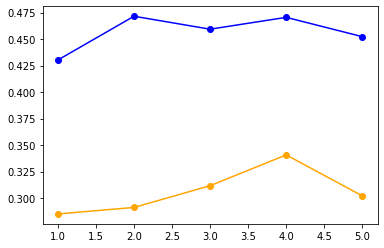

In [0]:
run()